In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# # setup plotting in a notebook in a reasonable way
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# # default figure aesthetics I'll be using,
# # there are other choices, see seaborn docs
# sns.set_style("white")
# sns.set_context("notebook")

In [18]:
df = pd.read_csv('SDSS_DR18.csv')
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# **EDA**

<Axes: xlabel='class', ylabel='Count'>

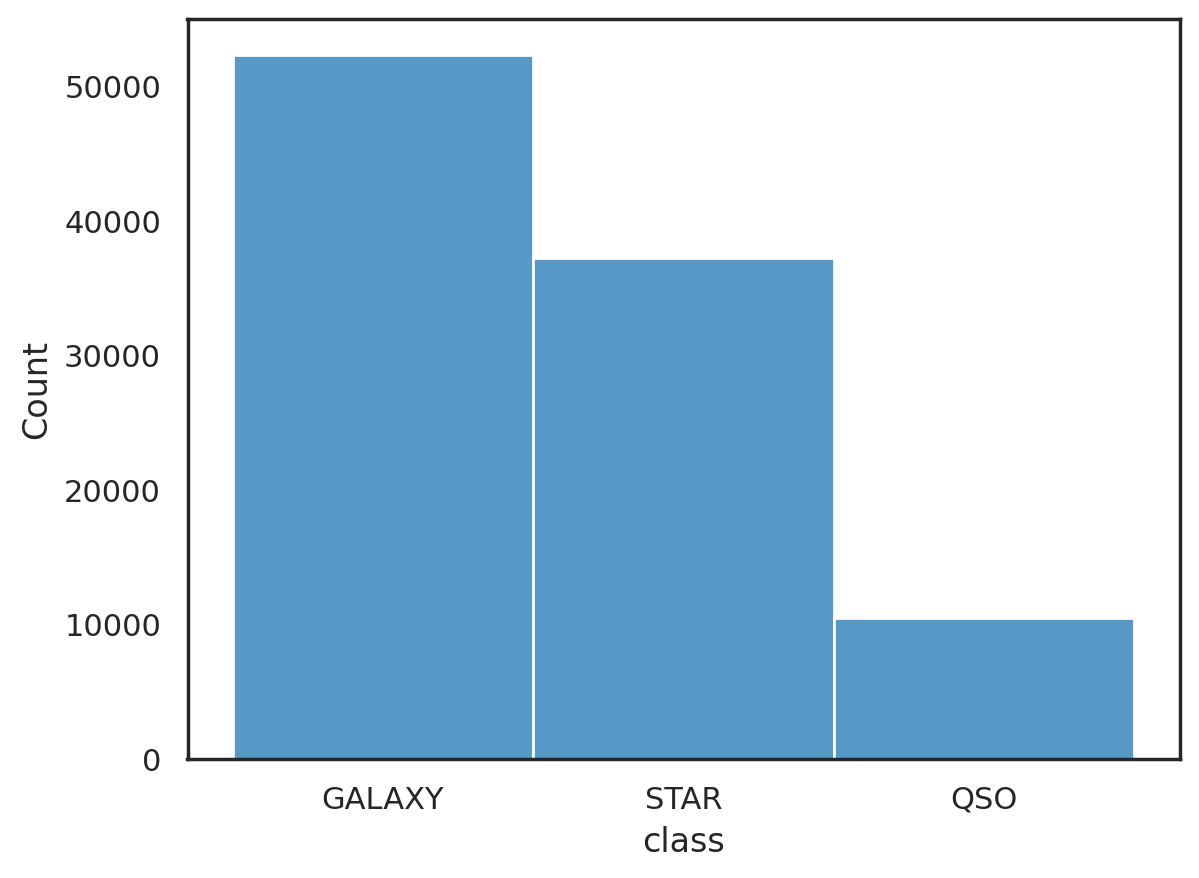

In [19]:
sns.histplot(df['class']) #uneven dataset

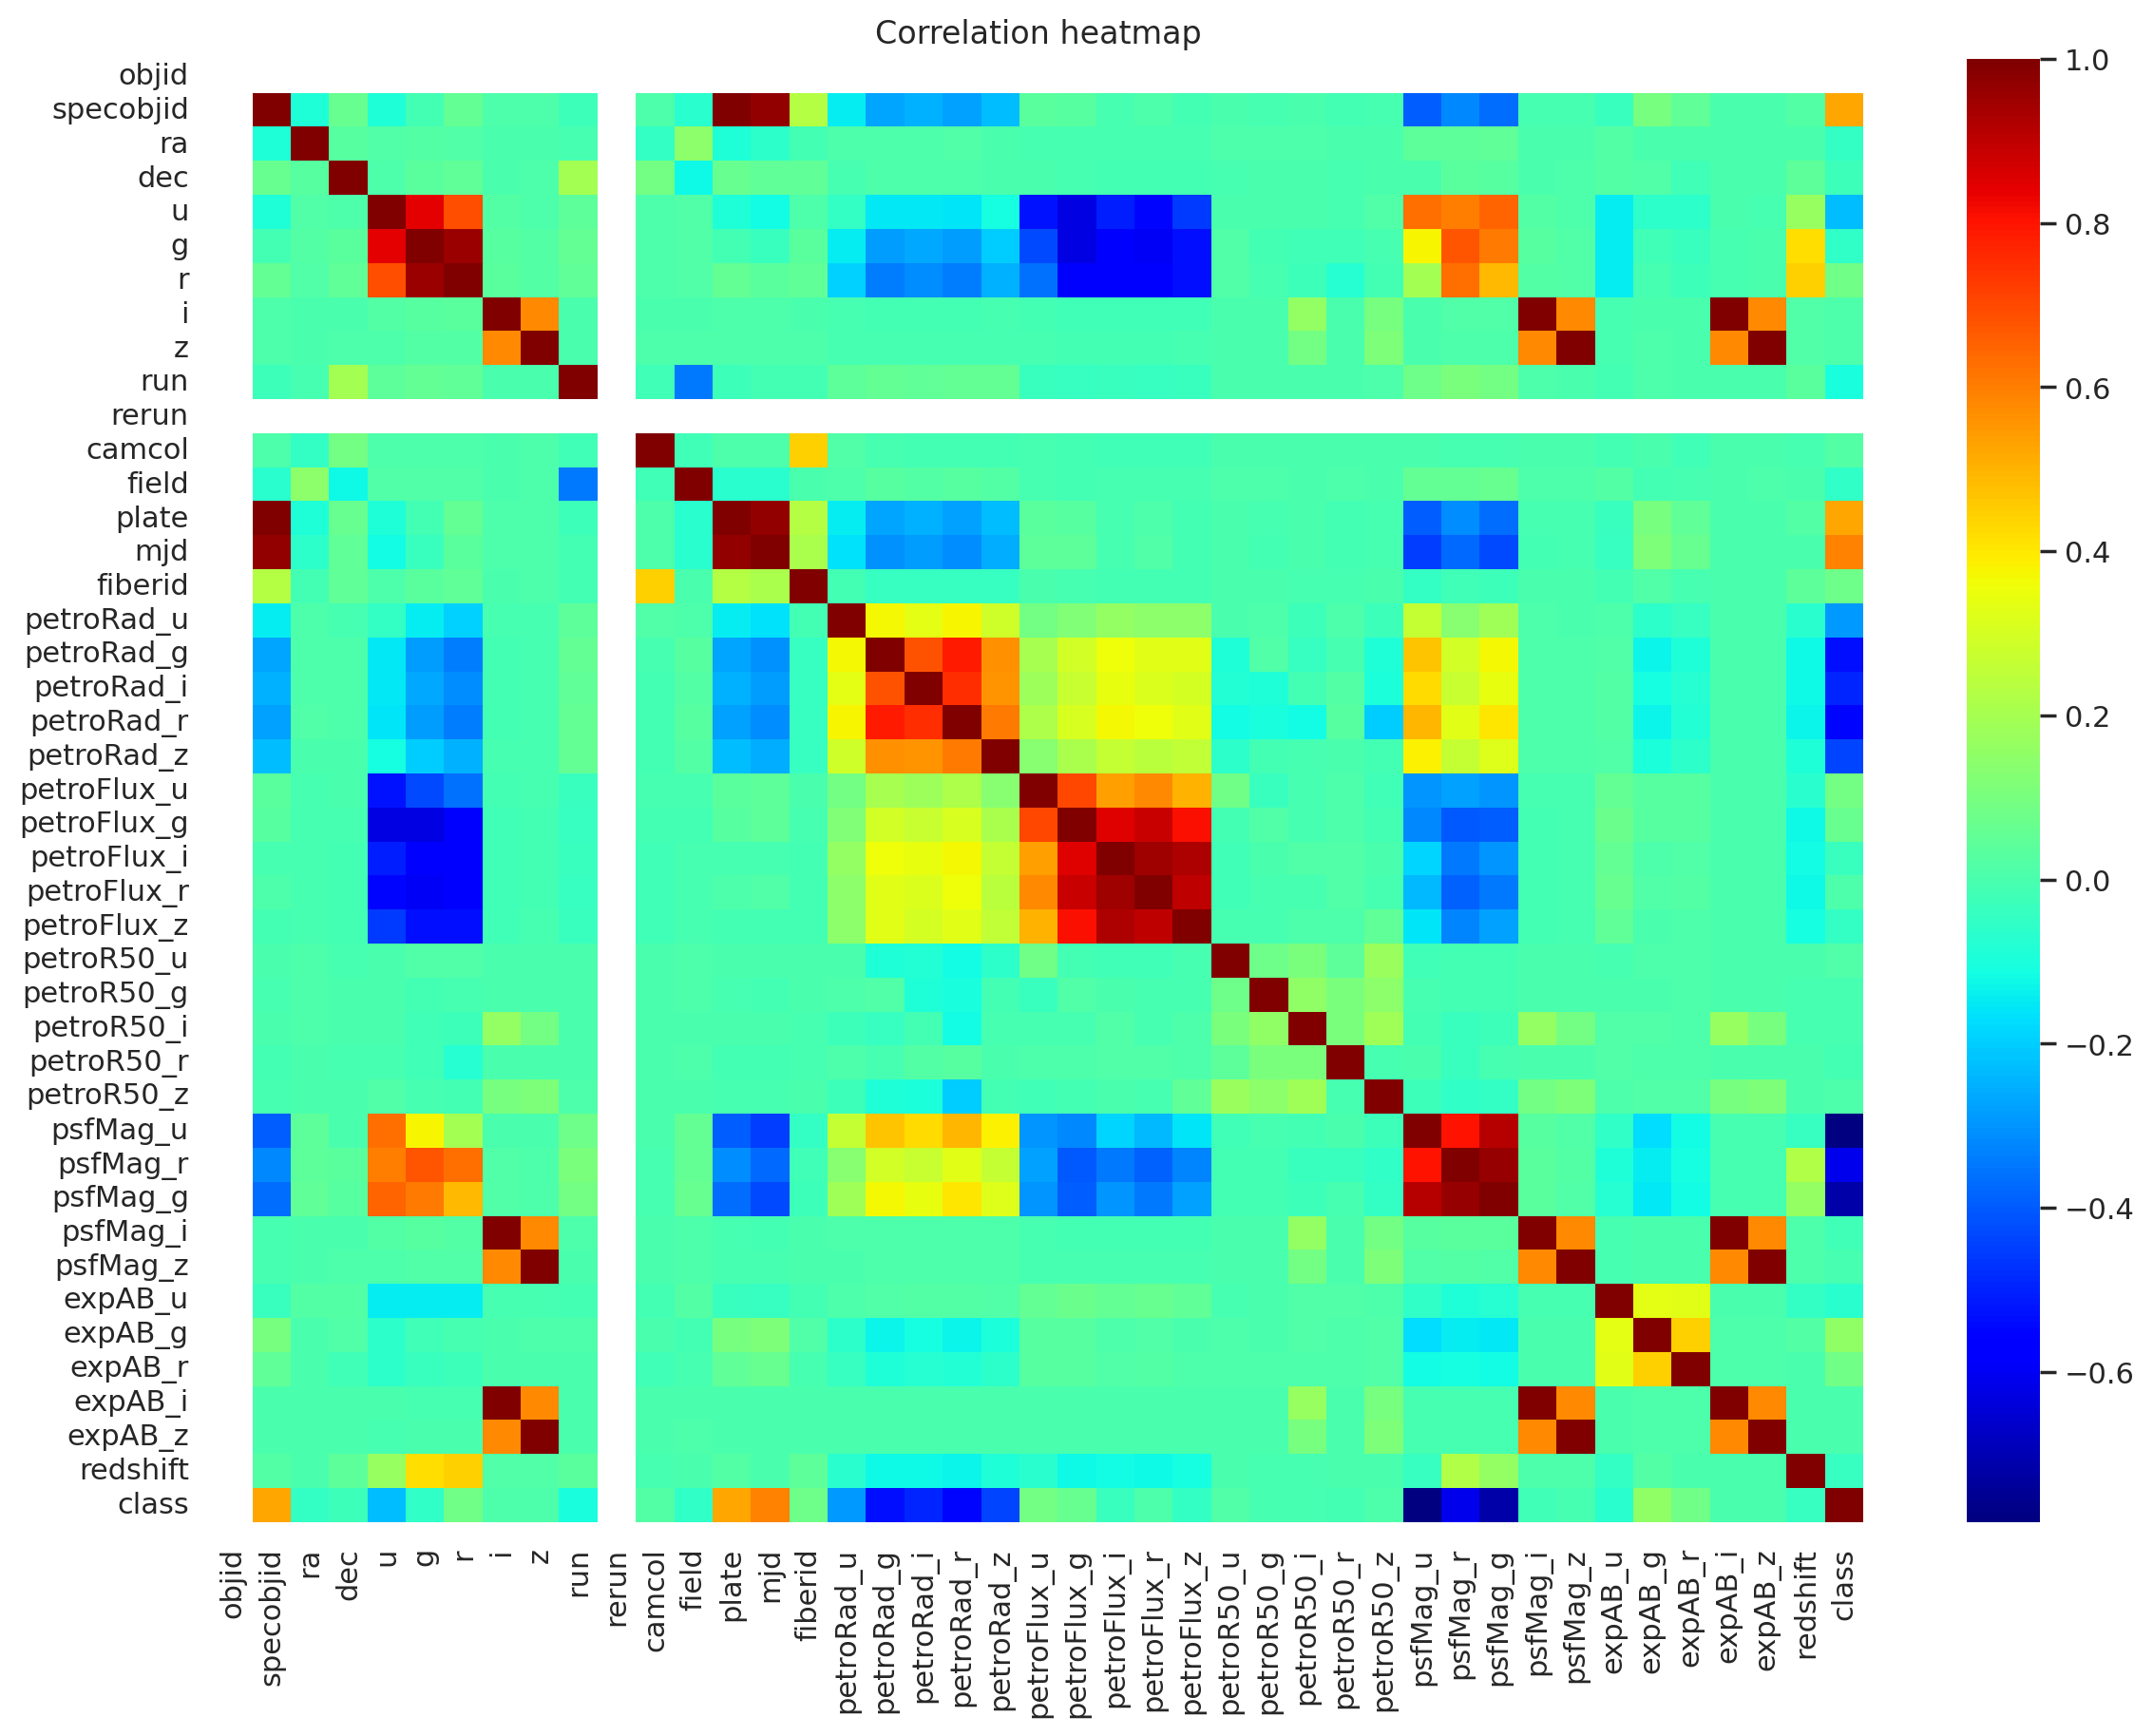

<ipython-input-20-2778a23addc1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_corr.index, y=df_corr.values, palette='coolwarm')


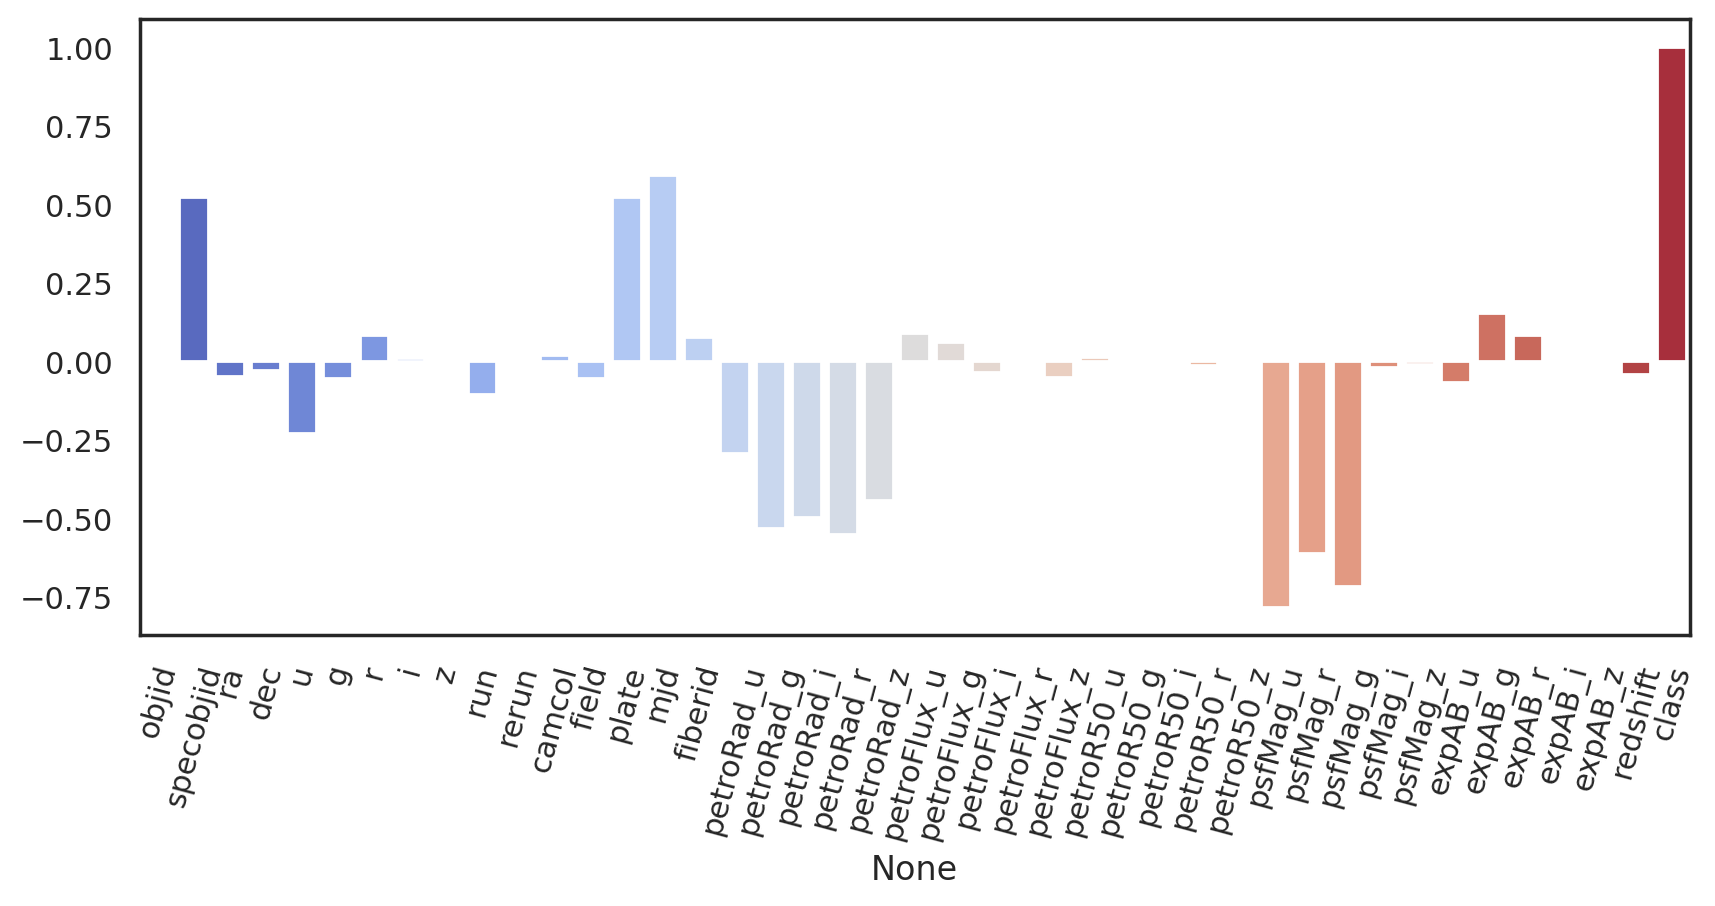

In [20]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['class'] = Le.fit_transform(df['class'])
df_corr = df.corrwith(df['class'])
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='jet')
plt.title('Correlation heatmap')
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=df_corr.index, y=df_corr.values, palette='coolwarm')
plt.xticks(rotation=75)
plt.show()

# **Data Cleaning**

In [21]:
df.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')

In [30]:
# Dropping columns by domain knowledge. Not sure if we should drop these
df_clean = df.drop(columns=['objid','specobjid','ra','dec','run','rerun','camcol','field','plate','mjd','fiberid'])

df_clean.head()

,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,0
1,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,2
2,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,0
3,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,2
4,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,2


**Check for missing values**

In [23]:
df.isna().sum()

objid          0
specobjid      0
ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
run            0
rerun          0
camcol         0
field          0
plate          0
mjd            0
fiberid        0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
redshift       0
class          0
dtype: int64

In [31]:
y = df_clean['class']
x = df_clean.drop(columns='class')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant features for clustering
features = x[x.columns]

# Normalizing the feature values
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# **Model selection - KMeans Clustering**


- I expect KMeans clustering to not do very well as this dataset is uneven, thought it still can be a good comparison

In [32]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Applying K-Means Clustering
k = 3 # tries 3 because we have 3 classes here
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Evaluating the clustering
silhouette_avg = silhouette_score(features_scaled, clusters) # Metric mentioned in lecture 6 and maybe other lectures i dk

silhouette_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2848626107043214

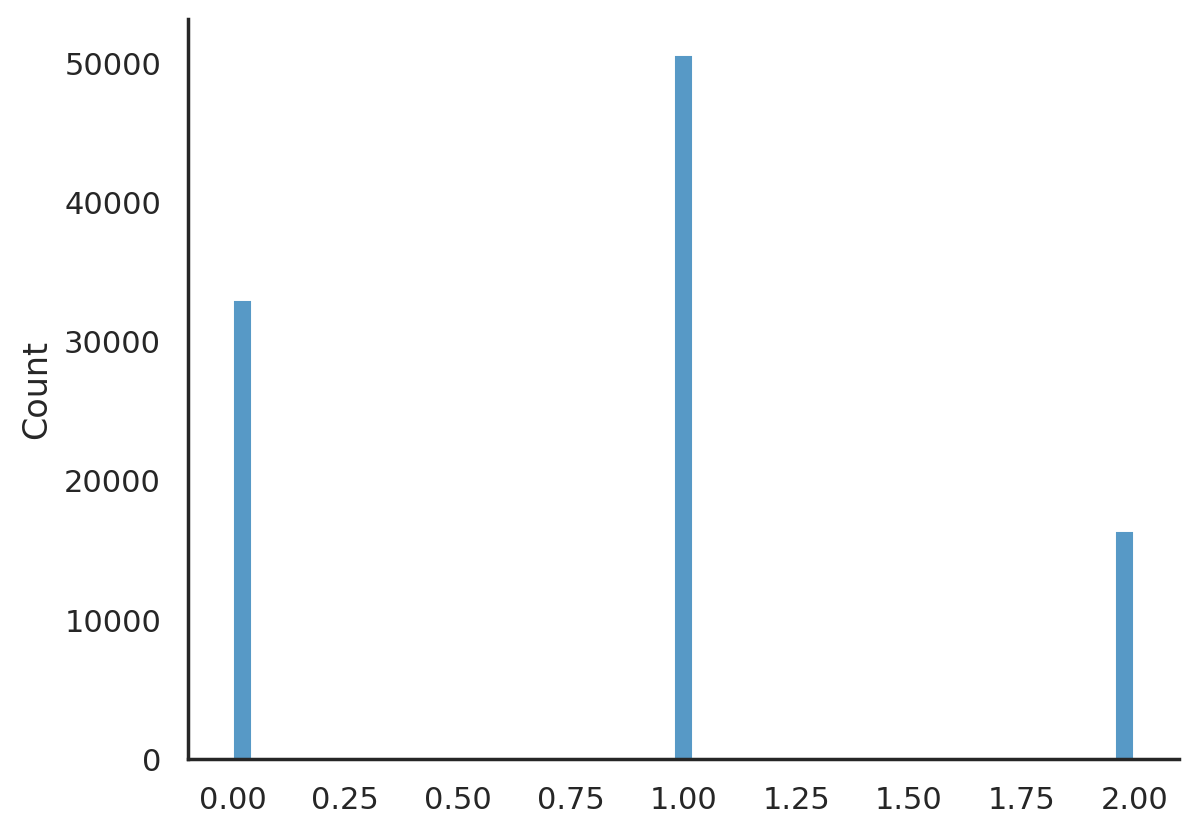

In [33]:
sns.histplot(clusters) # code from https://github.com/COGS118B/Lecture/blob/main/Notebook_L06_Kmeans.ipynb
sns.despine();

Three classes seems to not perform properly. I will do a loop below to search for k values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

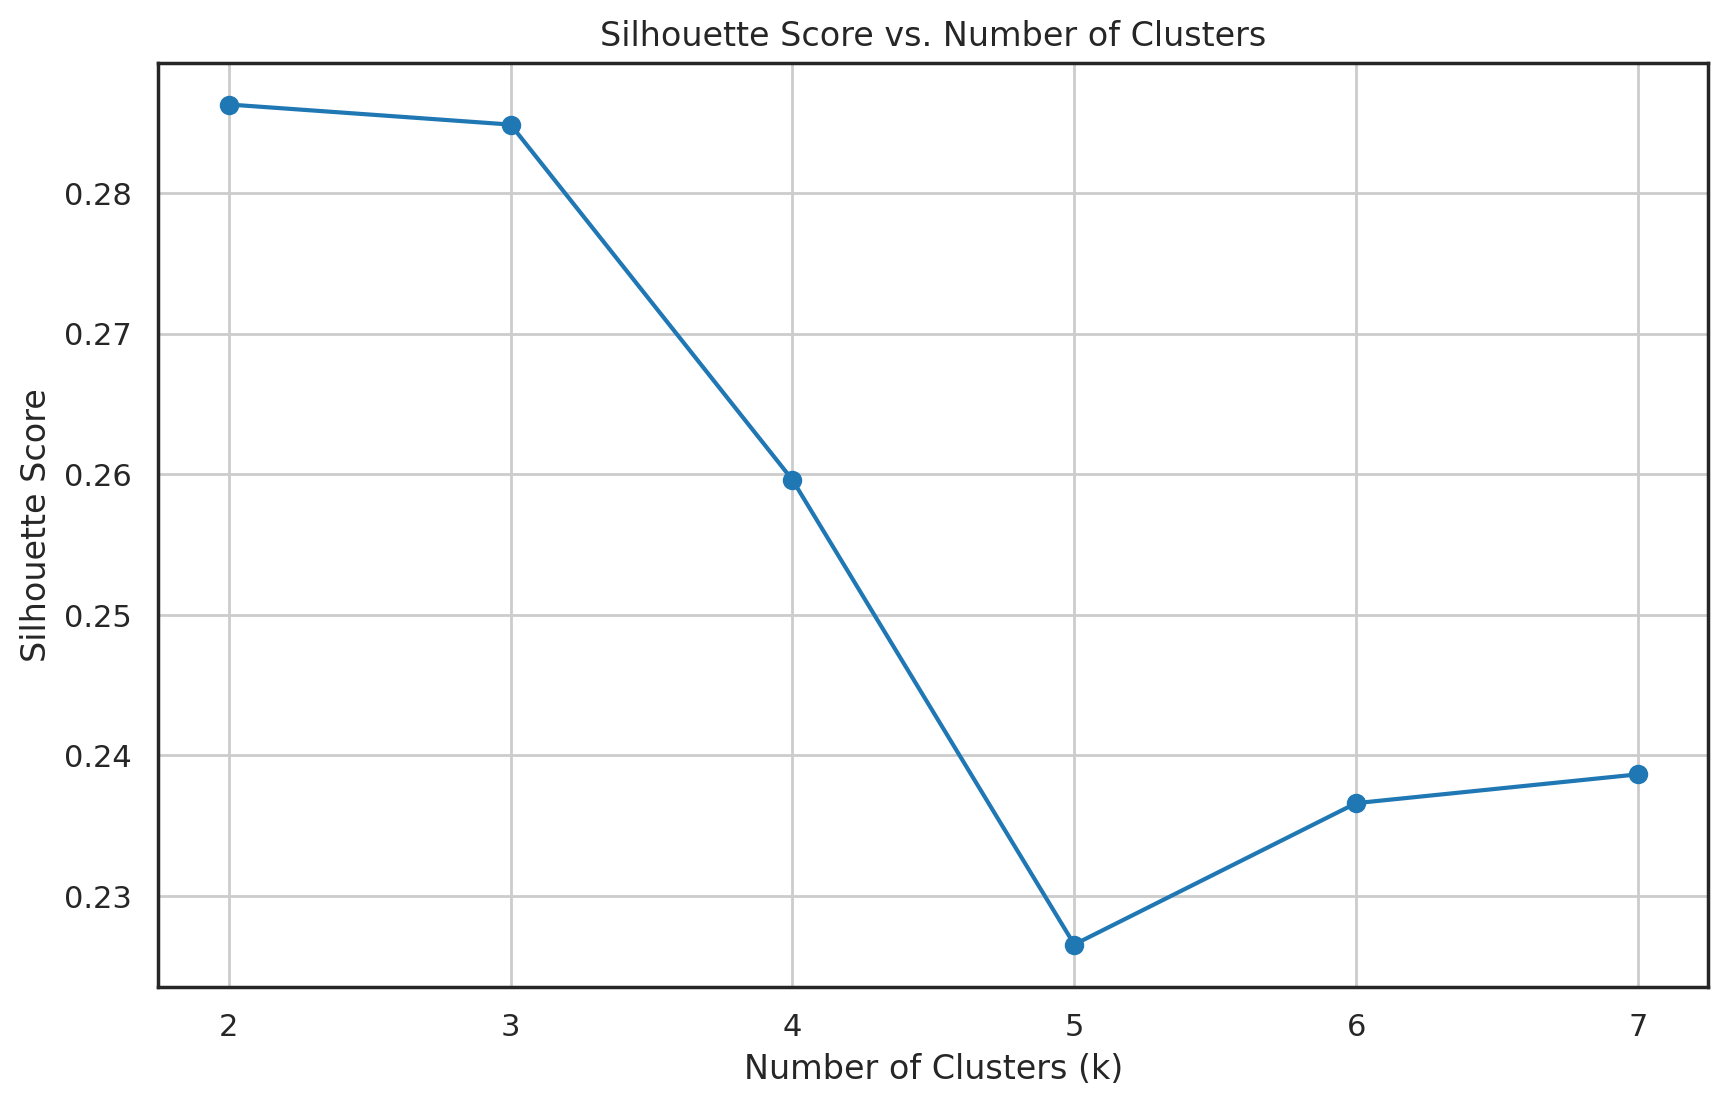

In [34]:
# Loop through k values from 2 to 7, applying K-means and calculating silhouette scores
silhouette_scores = []
k_values = range(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#NOTE: Runs for ~15mins, you don't have to re-run this code

In [35]:
silhouette_scores

[0.2862912336394074,
 0.2848626107043214,
 0.25959599197036454,
 0.22655782626187335,
 0.2366102663925648,
 0.23865740279301878]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


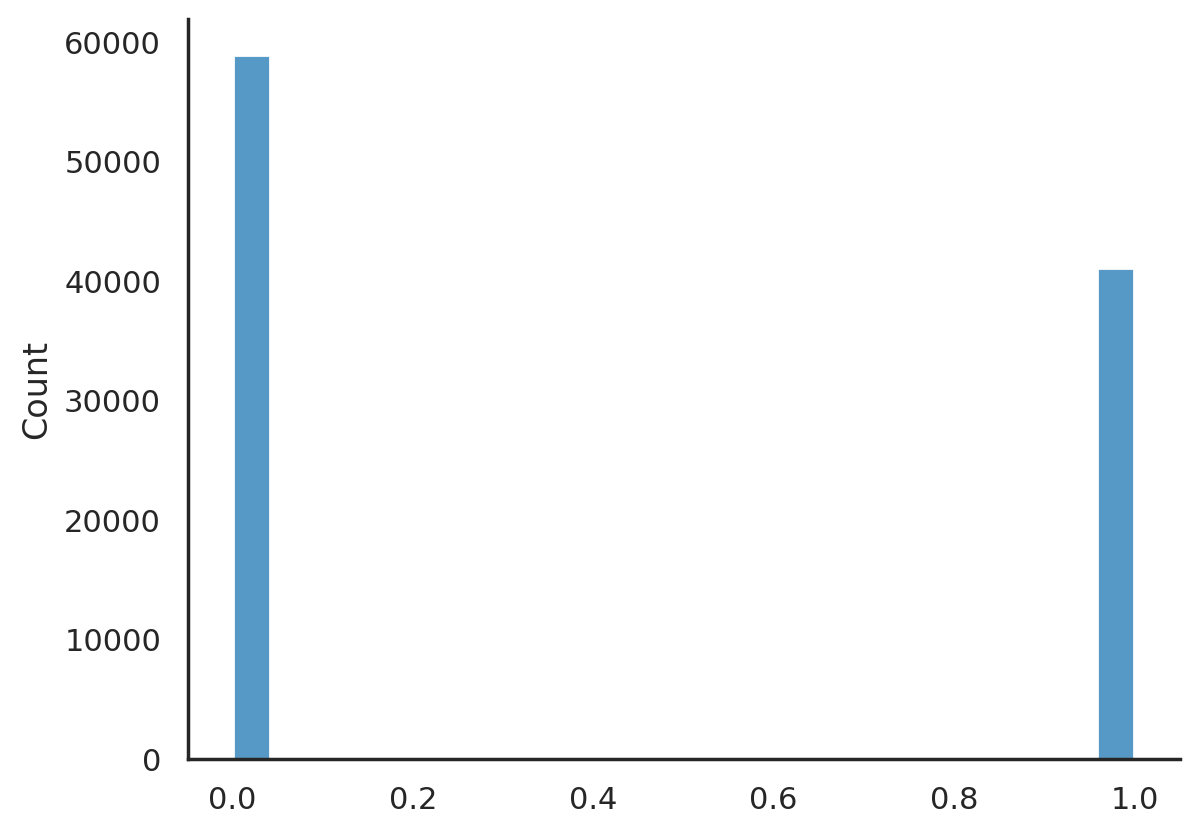

In [37]:
# Applying K-Means Clustering and see how k=2 looks like
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
sns.histplot(clusters)
sns.despine();

# **Model selection - Hierarchical Clustering**

# **Model selection - Gaussian Mixture Models (GMM)**